# Executive summary

Summary of this notebook

ES TBD

# Setup

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import unicodedata
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Manipulation

In [2]:
# Data frame from web scraping
df = pd.read_pickle('result_mod.pkl')

In [3]:
df.sample(5)

State  Overall_score  Quality_rank  Safety_rank  Salary  Income  \
23  Washington          53.36            26            5   54147   64129   
8         Iowa          61.06            11            9   55443   54736   
17    Oklahoma          55.22            37            3   45245   48568   
36      Hawaii          47.23            43           19   57674   73486   
47   Louisiana          27.42            44           51   50000   45727   

    Budget  Number_of_incarceration  Percent_SMI  Percent_poverty  \
23   10202                      550          4.7             13.2   
8    10669                      530          4.9             12.3   
17    7828                     1300          5.1             16.6   
36   12457                      510          3.5             11.5   
47   10749                     1420          4.8             19.9   

    Overall_score_H  Percent_married  log_percent_SMI  log_incarceration  \
23            55.89               48         1.547563           6.309918   
8             66.62               51         1.589235           6.272877   
17            48.06               39         1.629241           7.170120   
36            67.36               50         1.252763           6.234411   
47            38.95               36         1.568616           7.258412   

    log_salary  log_budget  log_income  
23   10.899458    9.230339   11.068652  
8    10.923111    9.275098   10.910277  
17   10.719847    8.965462   10.790720  
36   10.962562    9.430038   11.204850  
47   10.819778    9.282568   10.730444

In [4]:
df['log_log_salary']=np.log(df.log_salary)


In [5]:
df.corr()

Overall_score  Quality_rank  Safety_rank    Salary  \
Overall_score                 1.000000     -0.870543    -0.798956  0.397292   
Quality_rank                 -0.870543      1.000000     0.488974 -0.361223   
Safety_rank                  -0.798956      0.488974     1.000000 -0.202369   
Salary                        0.397292     -0.361223    -0.202369  1.000000   
Income                        0.559595     -0.498897    -0.405059  0.648897   
Budget                        0.379418     -0.465702    -0.138569  0.758127   
Number_of_incarceration      -0.627074      0.616553     0.442733 -0.454299   
Percent_SMI                  -0.131972     -0.027035     0.209957 -0.177429   
Percent_poverty              -0.718104      0.676407     0.539715 -0.412568   
Overall_score_H               0.672950     -0.642890    -0.504480  0.310051   
Percent_married               0.704728     -0.662595    -0.484275  0.397297   
log_percent_SMI              -0.120643     -0.034926     0.192594 -0.181829   
log_incarceration            -0.619010      0.610636     0.447747 -0.441029   
log_salary                    0.408091     -0.379961    -0.214440  0.996260   
log_budget                    0.390309     -0.487839    -0.153783  0.741649   
log_income                    0.586579     -0.515545    -0.440118  0.650667   
log_log_salary                0.408969     -0.381569    -0.215541  0.995550   

                           Income    Budget  Number_of_incarceration  \
Overall_score            0.559595  0.379418                -0.627074   
Quality_rank            -0.498897 -0.465702                 0.616553   
Safety_rank             -0.405059 -0.138569                 0.442733   
Salary                   0.648897  0.758127                -0.454299   
Income                   1.000000  0.602636                -0.551058   
Budget                   0.602636  1.000000                -0.517864   
Number_of_incarceration -0.551058 -0.517864                 1.000000   
Percent_SMI             -0.365149 -0.214484                -0.058711   
Percent_poverty         -0.851151 -0.510921                 0.692920   
Overall_score_H          0.594387  0.336213                -0.771355   
Percent_married          0.691589  0.364298                -0.746797   
log_percent_SMI         -0.385579 -0.225807                -0.040202   
log_incarceration       -0.528633 -0.531544                 0.980900   
log_salary               0.657461  0.761666                -0.465845   
log_budget               0.590733  0.987415                -0.532297   
log_income               0.996464  0.592591                -0.566055   
log_log_salary           0.657925  0.761618                -0.466733   

                         Percent_SMI  Percent_poverty  Overall_score_H  \
Overall_score              -0.131972        -0.718104         0.672950   
Quality_rank               -0.027035         0.676407        -0.642890   
Safety_rank                 0.209957         0.539715        -0.504480   
Salary                     -0.177429        -0.412568         0.310051   
Income                     -0.365149        -0.851151         0.594387   
Budget                     -0.214484        -0.510921         0.336213   
Number_of_incarceration    -0.058711         0.692920        -0.771355   
Percent_SMI                 1.000000         0.199595        -0.084646   
Percent_poverty             0.199595         1.000000        -0.751678   
Overall_score_H            -0.084646        -0.751678         1.000000   
Percent_married            -0.062378        -0.834091         0.792286   
log_percent_SMI             0.993603         0.215854        -0.105507   
log_incarceration          -0.061865         0.661258        -0.751174   
log_salary                 -0.170402        -0.434811         0.321140   
log_budget                 -0.225947        -0.513524         0.365304   
log_income                 -0.359468        -0.864656         0.619221   
log_log_salary             -0.169637        -0.

## Splitting up my 3 different 'y' terms

Break up the Overall_score, Quality_rank, Safety_rank. They are related to each other and quite correlated

In [6]:
df_overall_score = df.drop(['Quality_rank','Safety_rank','log_incarceration','log_percent_SMI','Percent_SMI','Salary','log_salary','Budget','Income'],1)
df_overall_score = df_overall_score.drop(['log_log_salary','log_budget'],1)
df_overall_score = df_overall_score.set_index('State')

In [7]:
df_quality_rank = df.drop(['Overall_score','Safety_rank'],1)
df_quality_rank = df_quality_rank.set_index('State')

In [8]:
df_safety_rank = df.drop(['Quality_rank','Overall_score'],1)
df_safety_rank = df_safety_rank.set_index('State')

In [9]:
df_overall_score.corr()

Overall_score  Number_of_incarceration  \
Overall_score                 1.000000                -0.627074   
Number_of_incarceration      -0.627074                 1.000000   
Percent_poverty              -0.718104                 0.692920   
Overall_score_H               0.672950                -0.771355   
Percent_married               0.704728                -0.746797   
log_income                    0.586579                -0.566055   

                         Percent_poverty  Overall_score_H  Percent_married  \
Overall_score                  -0.718104         0.672950         0.704728   
Number_of_incarceration         0.692920        -0.771355        -0.746797   
Percent_poverty                 1.000000        -0.751678        -0.834091   
Overall_score_H                -0.751678         1.000000         0.792286   
Percent_married                -0.834091         0.792286         1.000000   
log_income                     -0.864656         0.619221         0.717546   

                         log_income  
Overall_score              0.586579  
Number_of_incarceration   -0.566055  
Percent_poverty           -0.864656  
Overall_score_H            0.619221  
Percent_married            0.717546  
log_income                 1.000000

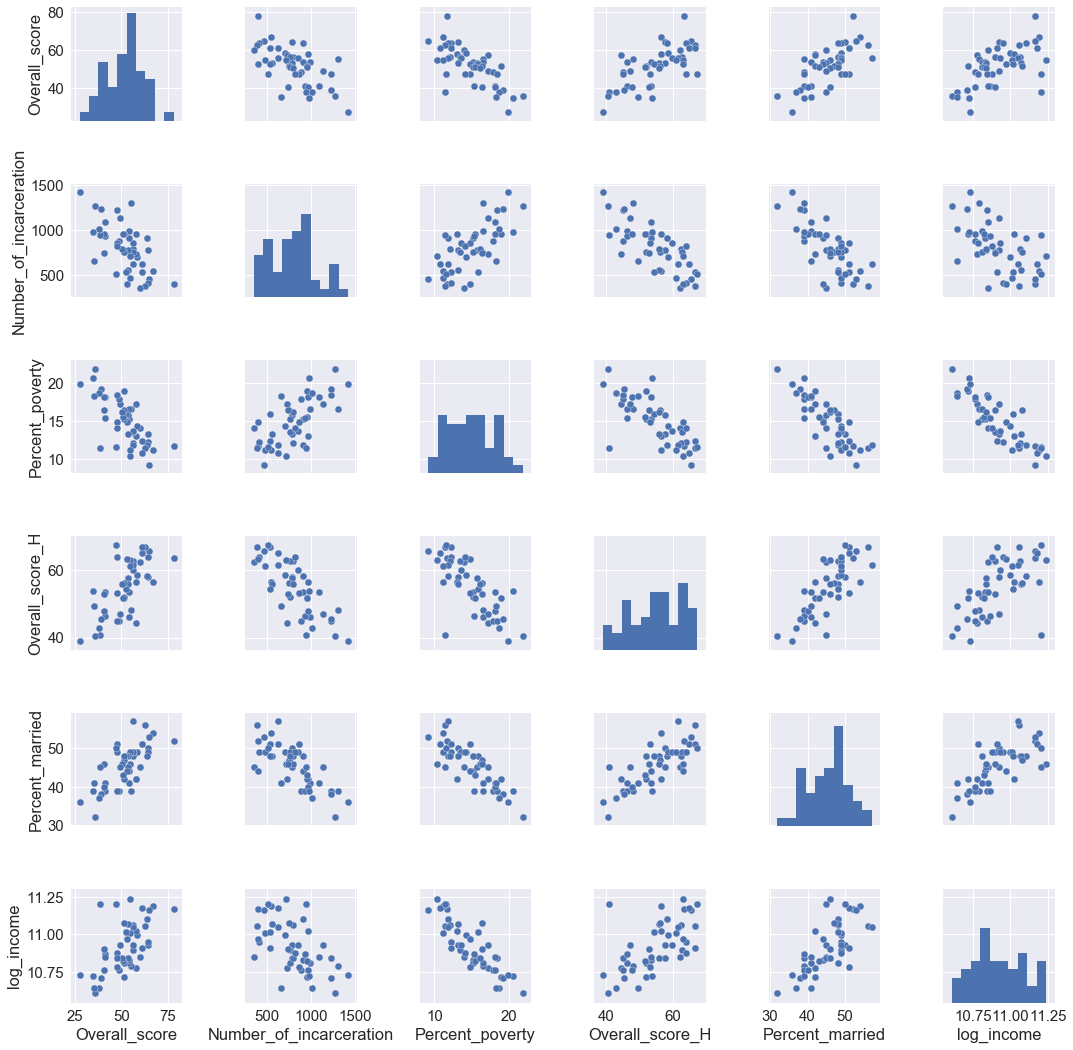

In [10]:
sns.set(font_scale=1.5)
sns.pairplot(df_overall_score)

## Polynomial terms

In [11]:
# test poly interactions and relationships with overall score

p = PolynomialFeatures(degree=2).fit(df_overall_score.drop('Overall_score',1))
features = pd.DataFrame(p.transform(df_overall_score.drop('Overall_score',1)), 
                        index = df_overall_score.index, 
                        columns=p.get_feature_names(df_overall_score.drop('Overall_score',1).columns))
features = features.reset_index(level=0)
features.rename(columns = {'index' : 'State'}, inplace = True)

In [12]:
features = pd.merge(features,df[['Overall_score','State']],on='State')
features.sample(5)

State    1  Number_of_incarceration  Percent_poverty  \
32  SouthCarolina  1.0                    880.0             17.9   
12  NorthCarolina  1.0                    730.0             17.2   
21        Indiana  1.0                    910.0             15.2   
17       Oklahoma  1.0                   1300.0             16.6   
20        Florida  1.0                    990.0             16.6   

    Overall_score_H  Percent_married  log_income  Number_of_incarceration^2  \
32            45.01             39.0   10.762954                   774400.0   
12            44.45             42.0   10.775408                   532900.0   
21            53.57             44.0   10.830362                   828100.0   
17            48.06             39.0   10.790720                  1690000.0   
20            46.07             41.0   10.808232                   980100.0   

    Number_of_incarceration Percent_poverty  \
32                                  15752.0   
12                                  12556.0   
21                                  13832.0   
17                                  21580.0   
20                                  16434.0   

    Number_of_incarceration Overall_score_H      ...        \
32                                  39608.8      ...         
12                                  32448.5      ...         
21                                  48748.7      ...         
17                                  62478.0      ...         
20                                  45609.3      ...         

    Percent_poverty Overall_score_H  Percent_poverty Percent_married  \
32                          805.679                            698.1   
12                          764.540                            722.4   
21                          814.264                            668.8   
17                          797.796                            647.4   
20                          764.762                            680.6   

    Percent_poverty log_income  Overall_score_H^2  \
32                  192.656875          2025.9001   
12                  185.337023          1975.8025   
21                  164.621504          2869.7449   
17                  179.125955          2309.7636   
20                  179.416649          2122.4449   

    Overall_score_H Percent_married  Overall_score_H log_income  \
32                          1755.39                  484.440556   
12                          1866.90                  478.966901   
21                          2357.08                  580.182497   
17                          1874.34                  518.602011   
20                          1888.87                  497.935243   

    Percent_married^2  Percent_married log_income  log_income^2  Overall_score  
32             1521.0                  419.755203    115.841177          48.58  
12             1764.0                  452.567150    116.109425          57.68  
21             1936.0                  476.535931    117.296743          54.00  
17             1521.0                  420.838086    116.439642          55.22  
20             1681.0                  443.137507    116.817876          54.02  

[5 rows x 23 columns]

In [13]:
#fdf = features.corr().sort_values(by=['Overall_score'])

Make x and y data frames

In [14]:
y = features.Overall_score
X = features.drop(['Overall_score','State'],1)

# Linear Regression - Overall score data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

## OLS analysis

In [18]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Overall_score   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     4.778
Date:                Wed, 25 Apr 2018   Prob (F-statistic):           0.000997
Time:                        09:05:40   Log-Likelihood:                -107.11
No. Observations:                  38   AIC:                             256.2
Df Residuals:                      17   BIC:                             290.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
1                                        1729.6425   1.94e+04      0.089      0.930   -3.92e+04    4.27e+04
Number_of_incarceration                     1.9741      1.132      1.745      0.099      -0.413       4.362
Percent_poverty                           101.0745    178.571      0.566      0.579    -275.677     477.826
Overall_score_H                           114.3030     61.132      1.870      0.079     -14.673     243.279
Percent_married                            -0.9412     91.987     -0.010      0.992    -195.016     193.133
log_income                              -1154.5447   3549.097     -0.325      0.749   -8642.484    6333.395
Number_of_incarceration^2               -5.561e-05   5.28e-05     -1.054      0.307      -0.000    5.57e-05
Number_of_incarceration Percent_poverty    -0.0117      0.008     -1.463      0.162      -0.029       0.005
Number_of_incarceration Overall_score_H    -0.0067      0.003     -2.167      0.045      -0.013      -0.000
Number_of_incarceration Percent_married    -0.0005      0.005     -0.118      0.908      -0.010       0.009
Number_of_incarceration log_income         -0.1208      0.097     -1.241      0.231      -0.326       0.084
Percent_poverty^2                          -0.7694      0.677     -1.136      0.272      -2.198       0.659
Percent_poverty Overall_score_H            -0.3318      0.371     -0.894      0.384      -1.115       0.451
Percent_poverty Percent_married            -0.6229      0.873     -0.713      0.485      -2.465       1.219
Percent_poverty log_income                 -2.2747     15.275     -0.149      0.883     -34.503      29.953
Overall_score_H^2                          -0.2489      0.087     -2.856      0.011      -0.433      -0.065
Overall_score_H Percent_married             0.1703      0.207      0.822      0.422      -0.267       0.607
Overall_score_H log_income                 -7.7023      4.645     -1.658      0.116     -17.503       2.098
Percent_married^2                          -0.2336      0.225     -1.037      0.314      -0.709       0.242
Percent_married log_income                  2.0328      7.560      0.269      0.791     -13.918      17.984
log_income^2                               73.9067    165.337      0.447      0.661    -274.924     422.738
==============================================================================
Omnibus:                        2.479   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.427
Skew:                           0.417   Prob(JB):                        0.490
Kurtosis:                       3.454   Cond. No.                     1.62e+10
==============================================================================

Warnings:
[1] St

## Ridge analysis

In [105]:
from sklearn.linear_model import Ridge

In [ ]:
# ridge = Ridge(alpha=1e-5)

# plt.plot(np.arange(100),np.squeeze(model.coef_))
# plt.plot(np.arange(100),w_true)
# plt.legend(["Estimated","True"])
# plt.show()

# ridge_coef = ridge.fit(X_train, y_train).coef_
# _ = plt.figure(figsize=(40,10))
# _ = plt.plot(range(len(X_train.columns)), ridge_coef)
# _ = plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=45)
# _ = plt.ylabel('Coefficients')

# plt.show()
# ridge.score(X_test,y_test)

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.436928062452462e-21 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.4369280624524622e-20 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.4369280624524618e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be 

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0881427199648971e-20 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0881427199648968e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0881427199648971e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be

0.01 0.7757756415902741


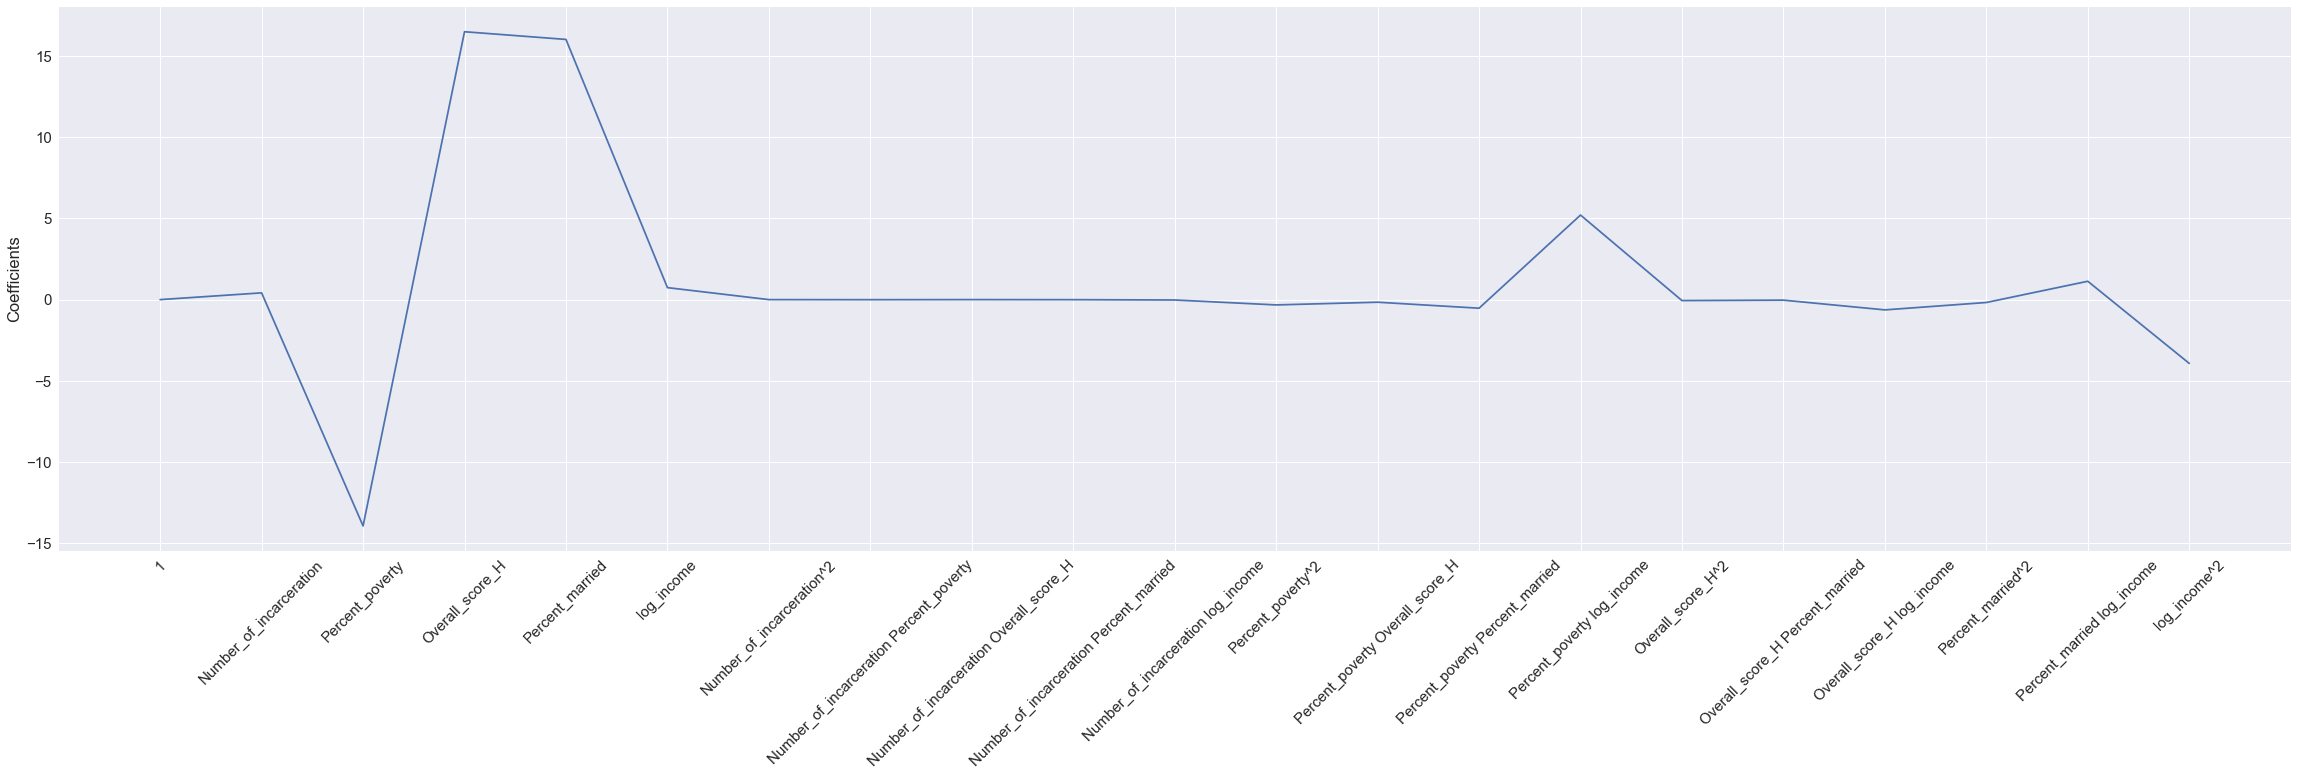

-12.341121490440212

In [114]:
alphas = [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]
best_score = -100
new_score = 1

kf = KFold(n_splits = 10,shuffle = True)
for train, test in kf.split(X):
    X_train, X_test = X.iloc[train,:], X.iloc[test,:]
    y_train, y_test = y[train], y[test]
    for i in alphas:
        ridge = Ridge(alpha = i)
        ridge.fit(X_train,y_train)
        new_score = ridge.score(X_test, y_test)
        if new_score > best_score:
            best_score = new_score
            best_alpha = i
print(best_alpha,best_score)

ridge = Ridge(alpha = best_alpha)
ridge_coef = ridge.fit(X_train, y_train).coef_
_ = plt.figure(figsize=(40,10))
_ = plt.plot(range(len(X_train.columns)), ridge_coef)
_ = plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=45)
_ = plt.ylabel('Coefficients')

plt.show()
ridge.score(X_test,y_test)

## Lasso analysis

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


100.0 0.499352792878468


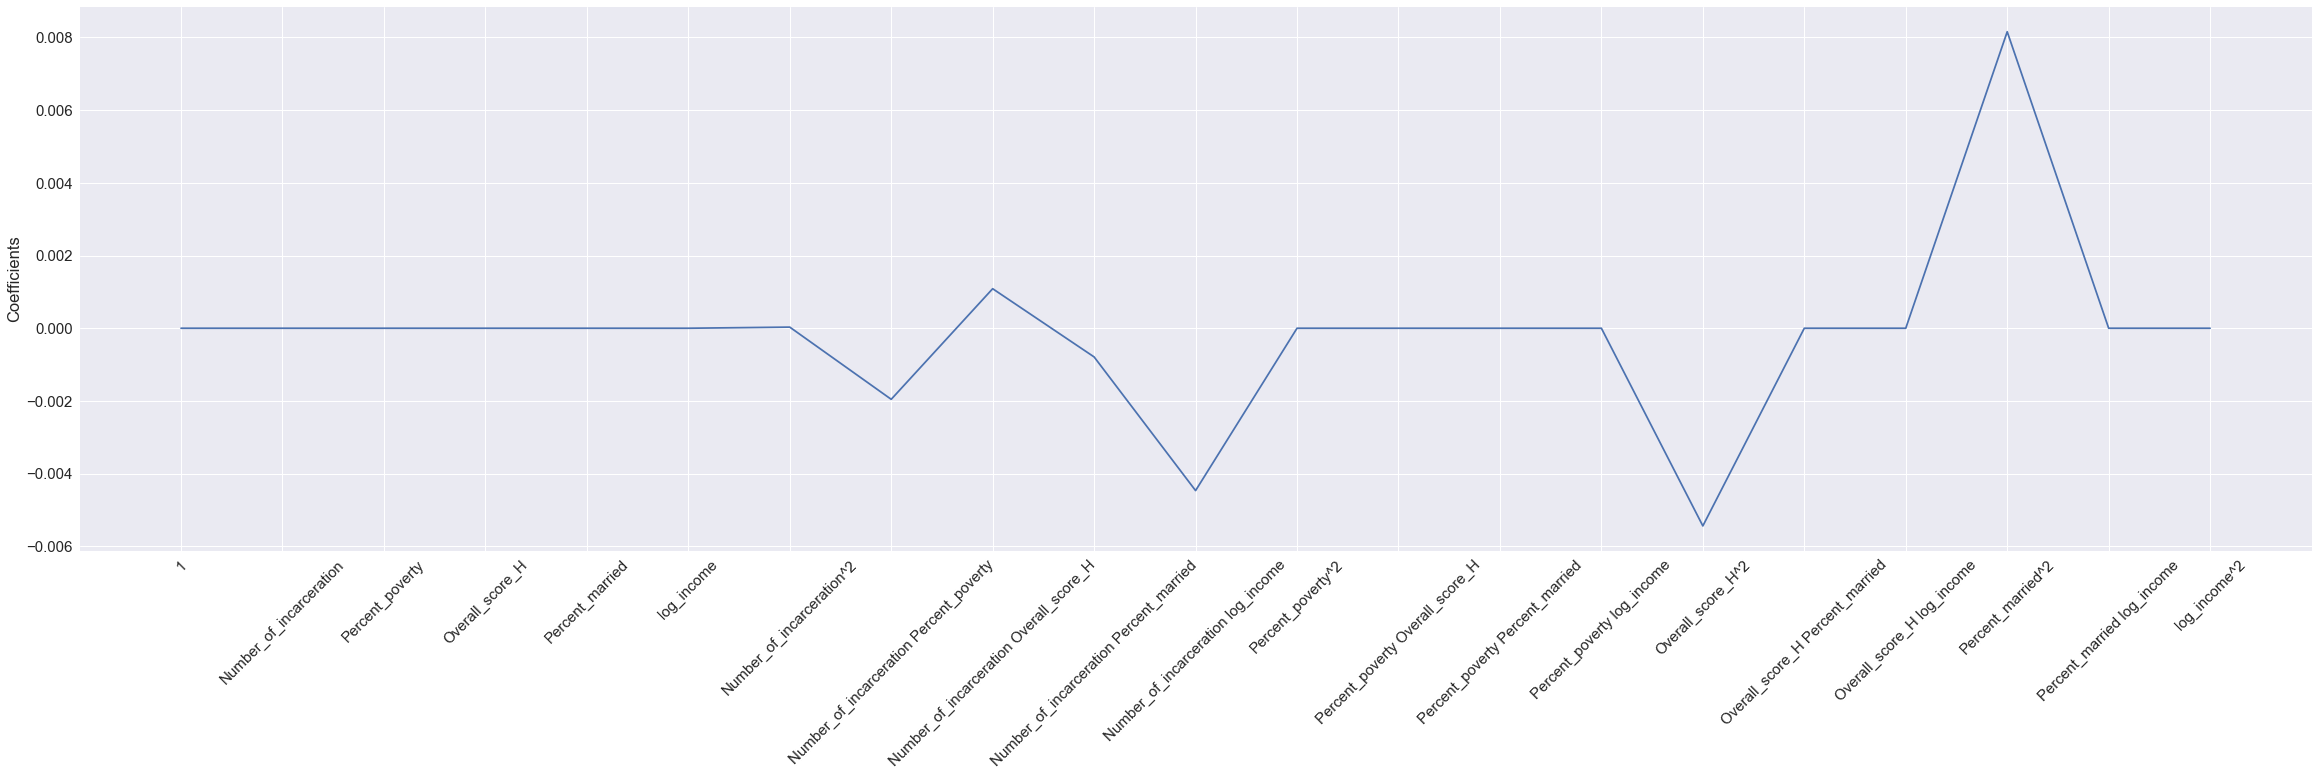

0.499352792878468

In [151]:
alphas = [1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]
best_score = -100
new_score = 1

kf = KFold(n_splits = 10,shuffle = True)
for train, test in kf.split(X):
    X_train, X_test = X.iloc[train,:], X.iloc[test,:]
    y_train, y_test = y[train], y[test]
    for i in alphas:
        lasso = Lasso(alpha = i)
        lasso.fit(X_train,y_train)
        new_score = lasso.score(X_test, y_test)
        if new_score > best_score:
            best_score = new_score
            best_alpha = i
print(best_alpha,best_score)

lasso = Lasso(alpha = best_alpha)
lasso_coef = lasso.fit(X_train, y_train).coef_
_ = plt.figure(figsize=(40,10))
_ = plt.plot(range(len(X_train.columns)), lasso_coef)
_ = plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=45)
_ = plt.ylabel('Coefficients')

plt.show()
lasso.score(X_test,y_test)



In [129]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [152]:
y_predict = lasso.predict(X_test)

In [153]:
rms = sqrt(mean_squared_error(y_test, y_predict))
round(rms,1)

3.5

## Lasso CV analysis

In [104]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

## ElasticNet analysis

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1e-4)
elastic_coef = elastic.fit(x, y).coef_
_ = plt.figure(figsize=(40,10))
_ = plt.plot(range(len(x.columns)), lasso_coef)
_ = plt.xticks(range(len(x.columns)), x.columns, rotation=45)
_ = plt.ylabel('Coefficients')

plt.show()
lasso.score(x,y)

en = ElasticNet(1e-9)
en.fit(X_train,y_train)

en.score(X_test,y_test)

## ElasticNetCV analysis

In [ ]:
from sklearn.linear_model import ElasticNetCV
ela = ElasticNetCV(l1_ratio = .2)
ela.fit(X_train, y_train)

ela.score(X_test,y_test)

# Summary of results

Steps

# Next Steps

Steps

# Appendix

Random code dump

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
result_index = result_mod.set_index('State').

SyntaxError: invalid syntax (<ipython-input-22-181e99765b13>, line 1)

In [23]:
p = PolynomialFeatures(degree=2).fit(result_index)
print(p.get_feature_names(result_index.columns))
features = pd.DataFrame(p.transform(result_index), columns=p.get_feature_names(result_index.columns))
features

NameError: name 'result_index' is not defined

In [123]:
df

State  Overall_score  Quality_rank  Safety_rank  Salary  Income  \
0   Massachusetts          78.16             1            1   77804   70628   
1       NewJersey          66.92             2           15   69623   72222   
2    NewHampshire          64.65             4           14   57253   70303   
3       Wisconsin          64.25             6            7   54998   55638   
4         Vermont          64.09             5           11   60187   56990   
5        Virginia          63.77             8            8   51049   66262   
6       Minnesota          62.68             7           18   57346   63488   
7     Connecticut          61.31             3           33   72561   71346   
8            Iowa          61.06            11            9   55443   54736   
9           Maine          59.93            16            4   51077   51494   
10       Illinois          58.32             9           21   61602   59588   
11       Delaware          58.09            29            2   60214   61255   
12  NorthCarolina          57.68            27            6   49837   47830   
13       Colorado          56.28            15           20   46506   63909   
14         Kansas          56.24            23           16   47984   53906   
15   Pennsylvania          56.10            28           10   65863   55702   
16           Utah          55.95            24           17   47244   62912   
17       Oklahoma          55.22            37            3   45245   48568   
18       Maryland          54.79            10           35   66961   75847   
19    NorthDakota          54.67            17           23   51618   60557   
20        Florida          54.02            31           12   49407   49426   
21        Indiana          54.00            14           27   50554   50532   
22           Ohio          53.51            22           24   57000   51075   
23     Washington          53.36            26            5   54147   64129   
24    RhodeIsland          52.96            21           28   66477   58073   
25        NewYork          52.52            20           32   79637   60850   
26       Kentucky          51.58            13           41   52339   45215   
27     California          51.45            39           13   78711   64500   
28        Montana          51.40            19           37   51422   49509   
29       Missouri          50.94            25           36   48293   50238   
30       Michigan          50.55            30           26   62200   51084   
31          Texas          49.15            33           29   52575   55653   
32  SouthCarolina          48.58            40           22   48598   47238   
33          Idaho          47.44            38           31   47504   48275   
34    SouthDakota          47.40            34           39   42668   53017   
35        Georgia          47.32            36           38   54602   51244   
36         Hawaii          47.23            43           19   57674   73486   
37         Nevada          40.99            45           34   57376   52431   
38        Arizona          40.91            48           25   47403   51492   
39      Tennessee          40.58            35           49   48456   47275   
40         Oregon          40.38            41           48   61631   54148   
41        Alabama          39.06            42           46   48868   44765   
42         Alaska          38.20            47           43   68138   73355   
43       Arkansas          37.97            32           50   48616   41995   
44    Mississippi          35.99            49           45   42925   40593   
45   WestVirginia          35.42            46           47   45701   42019   
46      NewMexico          34.79            51           40   47500   45382   
47      Louisiana          27.42            44           51   50000   45727   

    Budget  Number_of_incarceration  Percent_SMI  Percent_poverty  \
0    15086                      400          4.2             11.7   
1 

# Notes

Root mean square error